## Titanic - Machine Learning from Disaster

https://www.kaggle.com/competitions/titanic

Load data and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

train_data = pd.read_csv('train.csv') # treating this as master dataset
test_data = pd.read_csv('test.csv') # not using this since we're not submitting for competition

EDA

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# handle missing value
train_data.drop(columns=['Cabin'], inplace=True) # drop Cabin column
train_data['Age'].fillna(train_data['Age'].median(), inplace=True) # impute missing Age with median
train_data.dropna(subset=['Embarked'], inplace=True) # drow rows (2) with null Embarked values

In [8]:
def count_plot(data, column, hue=None):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.countplot(x=column, hue=hue, data=data, ax=ax)
    ax.set_title(f'Distribution of {column} {"by " + hue if hue else ""}')
    plt.show()

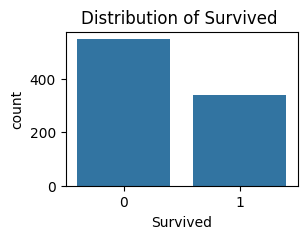

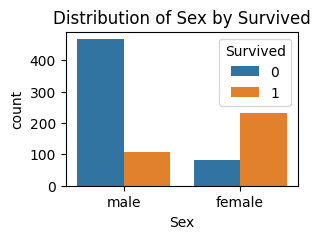

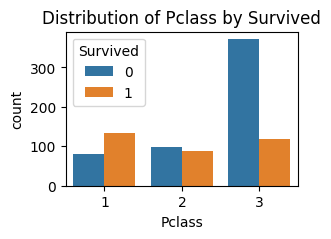

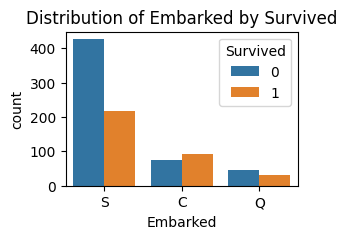

In [9]:
for i in ['Survived', 'Sex', 'Pclass', 'Embarked']:
    if i == 'Survived':
        count_plot(train_data, i)
    else:
        count_plot(train_data, i, hue='Survived')

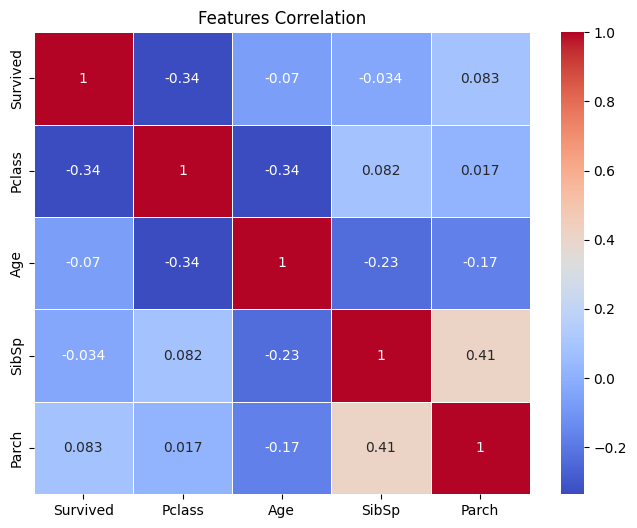

In [10]:
numeric_columns=train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']]
correlation_matrix = numeric_columns.corr()

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5, ax=ax)
ax.set_title('Features Correlation')
plt.show()

In [11]:
def bar_plot(data, x, y, title, ax):
    sns.barplot(data=data, x=x, y=y, ax=ax)
    ax.set_title(title)

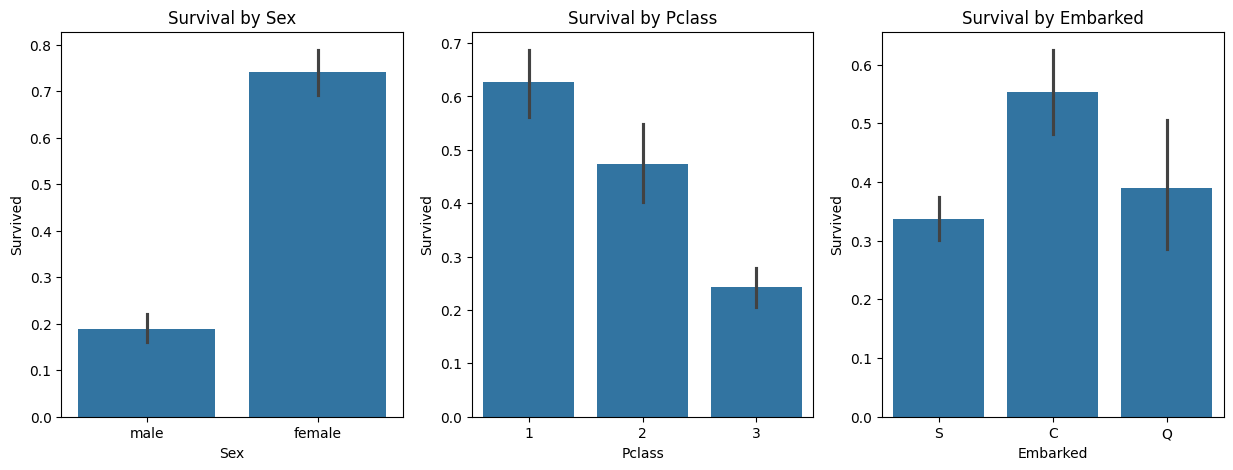

In [12]:
variables = ['Sex', 'Pclass', 'Embarked']
fig, ax = plt.subplots(nrows=1, ncols=len(variables), figsize=(15,5))

for i, x in enumerate(variables):
    title=f'Survival by {x}'
    bar_plot(data=train_data, x=x, y='Survived',title=title, ax=ax[i])

plt.show()

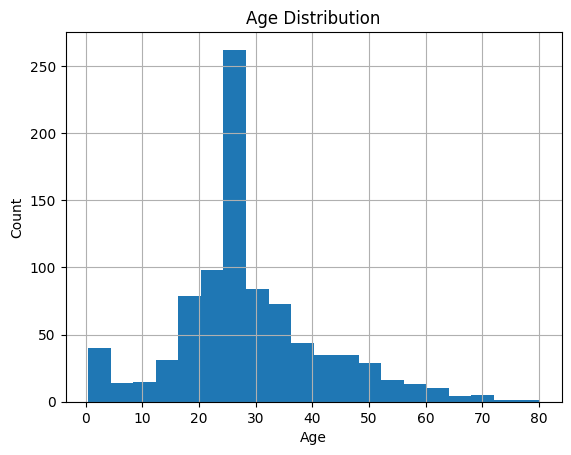

In [13]:
fig, ax=plt.subplots()

ax.set_title('Age Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Age')
train_data['Age'].hist(bins=20)
ax.grid(True)
plt.show()

In [14]:
# encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Embarked'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,False,False,True


In [15]:
train_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


In [16]:
# map sex (0 = male, 1 = female)
sex_map = {'male': 0, 'female': 1}
train_data['Sex'] = train_data['Sex'].map(sex_map)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [17]:
# check correlation coefficient between 'Fare' and 'Pclass'
correlation = train_data[['Fare', 'Pclass']].corr()

print(correlation) # include both Fare and Pclass in features since correlation not strong enough to warrant excluding either variable

            Fare    Pclass
Fare    1.000000 -0.548193
Pclass -0.548193  1.000000


Split data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = train_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = train_data['Survived']

X.head() 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (711, 9)
Shape of X_test: (178, 9)
Shape of y_train: (711,)
Shape of y_test: (178,)


Build ML model

In [22]:
# model 1. decision tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [30]:
# define model
model = DecisionTreeClassifier(random_state=42)

# hyperparameters
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid search with CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best parameter combination
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output classification report and confusion matrix
print("Classification Report:")
print(class_report)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nF1 score")
print(f1.round(2))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Confusion Matrix:
[[92 17]
 [15 54]]

F1 score
0.77


In [32]:
# model 2: random forest

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]  
}

In [35]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_estimator_rf = grid_search_rf.best_estimator_

y_pred_rf = best_estimator_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nF1 score")
print(f1_rf.round(2))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.72      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


Confusion Matrix for Random Forest Classifier:
[[89 20]
 [19 50]]

F1 score
0.72


In [ ]:
# cont from model 1 (decision tree) due to better performance

Text(0.5, 0, 'Importance')

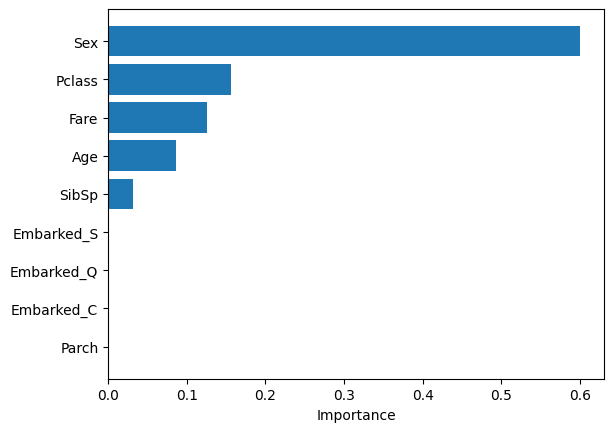

In [38]:
feature_importance_dt = grid_search.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_dt})
feature_importance_df = feature_importance_df.sort_values(by='Importance')

fig,ax=plt.subplots()
ax.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
ax.set_xlabel('Importance')